Plotting triangle 0 starting at right of old one
Plotting triangle 1 starting at left of old one
Plotting triangle 2 starting at top of old one
Plotting triangle 3 starting at right of old one
Plotting triangle 4 starting at left of old one
Plotting triangle 5 starting at top of old one
Plotting triangle 6 starting at right of old one
Plotting triangle 0 starting at right of old one
Plotting triangle 1 starting at left of old one
Plotting triangle 2 starting at top of old one
Plotting triangle 3 starting at right of old one
Plotting triangle 4 starting at left of old one
Plotting triangle 5 starting at top of old one
Plotting triangle 6 starting at right of old one


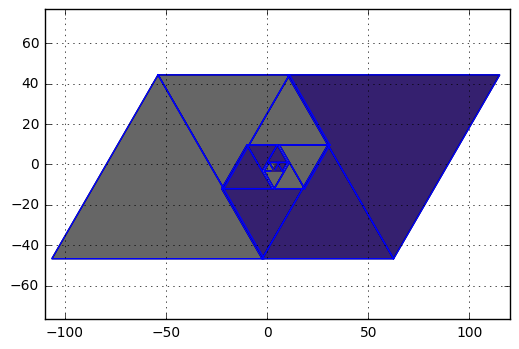

In [8]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import golden

def plot_equilateral_triangle(
        sidelength, index=0, lastlines=None,
        hinge="right", invert=False, fillcolor=None):
    # Find equilateral triangle height:
    height = math.sqrt(3.0) * (sidelength / 2.0)

    print("Plotting triangle {} starting at {} of old one".format(index, hinge))
    startx = starty = None
    # Start points will always be third vertex plotted in the prev triangle
    startx = lastlines[0].get_xdata()[2]
    starty = lastlines[0].get_ydata()[2]
    # Plot dot at start point
    #plt.plot([startx], [starty], 'ro')
    if hinge == "left":
        # Triangles started from left of prev get their vertices
        # plotted in this order:
        # R -> L -> T
        if invert:
            x1 = startx + sidelength # right vertex
            y1 = starty # right
            x2 = startx # left
            y2 = starty # left
            x3 = startx + (sidelength / 2.0) # top
            y3 = starty - height # top
        else:
            x1 = startx # right vertex
            y1 = starty # right
            x2 = startx - sidelength # left
            y2 = starty # left
            x3 = startx - (sidelength / 2.0) # top
            y3 = starty + height # top
    elif hinge == "right":
        # Triangles started from right of prev get their vertices
        # plotted in this order:
        # T -> R -> L
        if invert:
            x1 = startx # top
            y1 = starty # top
            x2 = startx - (sidelength / 2.0) # right
            y2 = starty + height # right
            x3 = startx + (sidelength / 2.0) # left
            y3 = starty + height # left
        else:
            x1 = startx # top
            y1 = starty # top
            x2 = startx + (sidelength / 2.0) # right
            y2 = starty - height # right
            x3 = startx - (sidelength / 2.0) # left
            y3 = starty - height # left
    elif hinge == "top":
        # Triangles started from top of prev get their vertices
        # plotted in this order:
        # L -> T -> R
        if invert:
            x1 = startx # left
            y1 = starty # left
            x2 = startx - (sidelength / 2.0) # top
            y2 = starty - height # top
            x3 = startx - sidelength # right vertex
            y3 = starty # right
        else:
            x1 = startx # left
            y1 = starty # left
            x2 = startx + (sidelength / 2.0) # top
            y2 = starty + height # top
            x3 = startx + sidelength # right vertex
            y3 = starty # right
    else:
        raise Exception("Bad hinge point {}".format(hinge))
    lines = ax.plot(np.array([x1, x2, x3, x1]), np.array([y1, y2, y3, y1]), linewidth=1.0, color="b")
    if fillcolor:
        plt.fill(np.array([x1, x2, x3, x1]), np.array([y1, y2, y3, y1]), fillcolor)
    return lines

#plt.ion() # Interactively display updates as they're plot()ted
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)

"""
#  start vertex          vertex plot order
=========================================
1  start at L            L -> T -> R # Doesn't fit with remaining pattern, so
                                     # plotting it outside the loop for now...
2  start at R of 1       T -> R -> L
3  start at L of 2       R -> L -> T
4  start at T of 3       L -> T -> R
5  start at R of 4       T -> R -> L
6  start at L of 5       R -> L -> T
"""

# Special case of first triangle
sidelength = 5.0
prev_sidelengths = [5.0]
height = math.sqrt(3.0) * (sidelength / 2.0)
# Plot in order: L -> T -> R
startx = starty = 1
x1 = startx + sidelength # right
y1 = starty # right
x2 = startx + (sidelength / 2.0) # top
y2 = starty - height # top
x3 = startx # left
y3 = starty # left
#plt.plot([x1], [y1], 'ro')
lastlines = ax.plot(np.array([x1, x2, x3, x1]), np.array([y1, y2, y3, y1]))
plt.fill(np.array([x1, x2, x3, x1]), np.array([y1, y2, y3, y1]), "#666666")

# Plot remaining triangles in a loop
hinge = "right"
for i in range(0, 7):
    if i % 2 == 0:
        invert = False
    else:
        invert = True
    lastlines = plot_equilateral_triangle(
            sidelength,
            index=i,
            lastlines=lastlines,
            hinge=hinge,
            invert=invert,
            fillcolor='#666666')

    prev_sidelengths.append(sidelength)
    sidelength = sidelength + prev_sidelengths[-2]
    #sidelength = sidelength * golden

    # Toggle hinge from right -> left -> top -> ...
    if hinge == "right":
        hinge = "left"
    elif hinge == "left":
        hinge = "top"
    elif hinge == "top":
        hinge = "right"
        
# First triangle of second batch
sidelength = 5.0
prev_sidelengths = [5.0]
height = math.sqrt(3.0) * (sidelength / 2.0)
# Plot in order: L -> T -> R
startx = 2.5
starty = 1 - height
x1 = startx # left
y1 = starty # left
x2 = startx + (sidelength / 2.0) # top
y2 = starty + height # top
x3 = startx + sidelength # right
y3 = starty # right
#plt.plot([x1], [y1], 'ro')
lastlines = ax.plot(np.array([x1, x2, x3, x1]), np.array([y1, y2, y3, y1]), color="#35206f")
plt.fill(np.array([x1, x2, x3, x1]), np.array([y1, y2, y3, y1]), "#35206f")

# Second batch
hinge = "right"
for i in range(0, 7):
    if i % 2 == 0:
        invert = True
    else:
        invert = False
    lastlines = plot_equilateral_triangle(
            sidelength,
            index=i,
            lastlines=lastlines,
            hinge=hinge,
            invert=invert,
            fillcolor='#35206f')
    
    prev_sidelengths.append(sidelength)
    sidelength = sidelength + prev_sidelengths[-2]
    #sidelength = sidelength * golden

    # Toggle hinge from right -> left -> top -> ...
    if hinge == "right":
        hinge = "left"
    elif hinge == "left":
        hinge = "top"
    elif hinge == "top":
        hinge = "right"

# Don't let aspect ratio get squashed
plt.axes().set_aspect('equal', 'datalim')
# Start zoomed in
plt.axis([-110,120,-50,50])
plt.show()
#while True:
#    plt.pause(0.05)